In [1]:
from sklearn import datasets
from sklearn.utils.extmath import softmax
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
import shutil
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

In /home/rrunix/anaconda3/envs/thesis/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rrunix/anaconda3/envs/thesis/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rrunix/anaconda3/envs/thesis/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rrunix/anaconda3/envs/thesis/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rru

In [2]:
dist_pos = multivariate_normal([4, 6], [[2, -4], [0, 4]])
dist_neg_1 = multivariate_normal([0, 0], [[2, 0], [0, 1]])
dist_neg_2 = multivariate_normal([10, 6], [[1, 0], [0, 2]])

In [3]:
n_points_dist = 400
SEED = 1234

X = np.row_stack((    
    dist_pos.rvs(size=n_points_dist, random_state=SEED),
    dist_neg_1.rvs(size=n_points_dist, random_state=SEED),
    dist_neg_2.rvs(size=n_points_dist, random_state=SEED)
))

y = np.array([1] * n_points_dist + [0] * 2 * n_points_dist)

/home/rrunix/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/stats/_multivariate.py:753: RuntimeWarning: covariance is not symmetric positive-semidefinite.


In [4]:
tree_cart_clf = DecisionTreeClassifier().fit(X, y)
tree_id3_clf = Id3Estimator().fit(X, y)

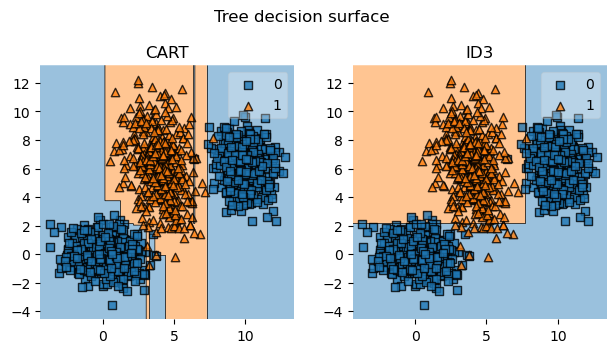

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, subplot_kw={'aspect': 1})
ax1.set_box_aspect(1)
ax2.set_box_aspect(1)

plot_decision_regions(X, y, tree_cart_clf, ax=ax1)
plot_decision_regions(X, y, tree_id3_clf, ax=ax2)

fig.suptitle("Tree decision surface", y=0.85)
ax1.set_title("CART")
ax2.set_title("ID3")
plt.tight_layout()

plt.savefig("imgs_04/decision_regions.png", dpi=600, bbox_inches='tight')

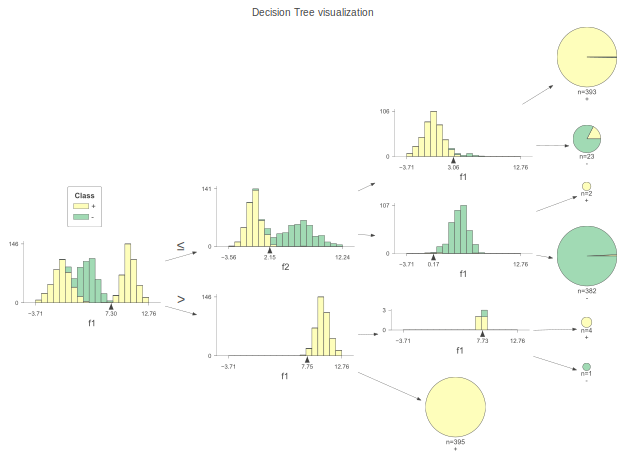

In [15]:
model_ = DecisionTreeClassifier(max_depth=3).fit(X, y)
viz_model = dtreeviz.model(model_,
                           X_train=X, y_train=y,
                           feature_names=["f1", "f2"],
                           target_name="Class", class_names=["+", "-"])

viz = viz_model.view(depth_range_to_display=(0, 3), orientation="LR", title="Decision Tree visualization")
viz

In [14]:
viz.save("imgs_04/tree_example.svg")

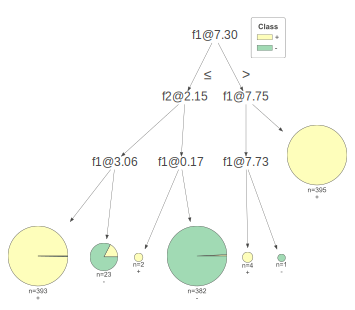

In [18]:
viz_model.view(fancy=False)

In [21]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X, y)

RandomForestClassifier()